In [ ]:
import pandas as pd
!pip install pysentimiento
from pysentimiento import create_analyzer
from transformers import pipeline, AutoTokenizer
from transformers import AutoModelForSequenceClassification
import json

benchmark=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OurBenchmark.csv')

analyzer = create_analyzer(task="emotion", lang="es")  ###### RoBERTuito
beto = pipeline("text-classification", model="finiteautomata/beto-emotion-analysis")  ###### BETO

####################################   Spanish GPT-2 fine-tuned on filtered salmeron2024fine dataset ####################################

checkpoint_path_peerj = '/content/drive/MyDrive/Colab Notebooks/peerj-fine-grain-emotion-analysis-main/code/results2/GPT2_Plantl_Classification'
tokenizer_peerj = AutoTokenizer.from_pretrained(checkpoint_path_peerj)
model_peerj = AutoModelForSequenceClassification.from_pretrained(checkpoint_path_peerj)
classifier_peerj = pipeline("text-classification", model=model_peerj, tokenizer=tokenizer_peerj, device=0)
with open(f'/content/drive/MyDrive/Colab Notebooks/peerj-fine-grain-emotion-analysis-main/code/results2/GPT2_Plantl_Classification/label_mappings.json', 'r') as f:
    id2label_peerj = json.load(f)
id2label_peerj = id2label_peerj['id2label']

####################################   Spanish GPT-2 fine-tuned on filtered tass 2020 task B dataset ####################################

checkpoint_path_tass2020 = '/content/drive/MyDrive/Colab Notebooks/peerj-fine-grain-emotion-analysis-main/code/results4/GPT2_Plantl_Classification'
tokenizer_tass2020 = AutoTokenizer.from_pretrained(checkpoint_path_tass2020)
model_tass2020 = AutoModelForSequenceClassification.from_pretrained(checkpoint_path_tass2020)
classifier_tass2020 = pipeline("text-classification", model=model_tass2020, tokenizer=tokenizer_tass2020, device=0)
with open(f'/content/drive/MyDrive/Colab Notebooks/peerj-fine-grain-emotion-analysis-main/code/results4/GPT2_Plantl_Classification/label_mappings.json', 'r') as f:
    id2label_tass2020 = json.load(f)
id2label_tass2020 = id2label_tass2020['id2label']



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 46.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/435M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/439M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/528 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
benchmark['preds_robertuito'] = benchmark['oracion'].apply(lambda x: analyzer.predict(x).output)
benchmark['preds_robertuito'] = benchmark['preds_robertuito'].replace('others', 'neutral')
benchmark['preds_beto'] = benchmark['oracion'].apply(lambda x: beto(x)[0]['label'])
benchmark['preds_beto'] = benchmark['preds_beto'].replace('others', 'neutral')
benchmark['preds_gpt_peerj'] = benchmark['oracion'].apply(lambda x: classifier_peerj(x)[0]['label'])
benchmark['preds_gpt_peerj'] = benchmark['preds_gpt_peerj'].apply(lambda x: id2label_peerj[x.split('_')[1]])
benchmark['preds_gpt_tass2020'] = benchmark['oracion'].apply(lambda x: classifier_tass2020(x)[0]['label'])
benchmark['preds_gpt_tass2020'] = benchmark['preds_gpt_tass2020'].apply(lambda x: id2label_tass2020[x.split('_')[1]])
benchmark['preds_gpt_tass2020'] = benchmark['preds_gpt_tass2020'].replace('others', 'neutral')
#benchmark.to_csv('/content/drive/MyDrive/Colab Notebooks/OurBenchmark_JEDM.csv', index=False)

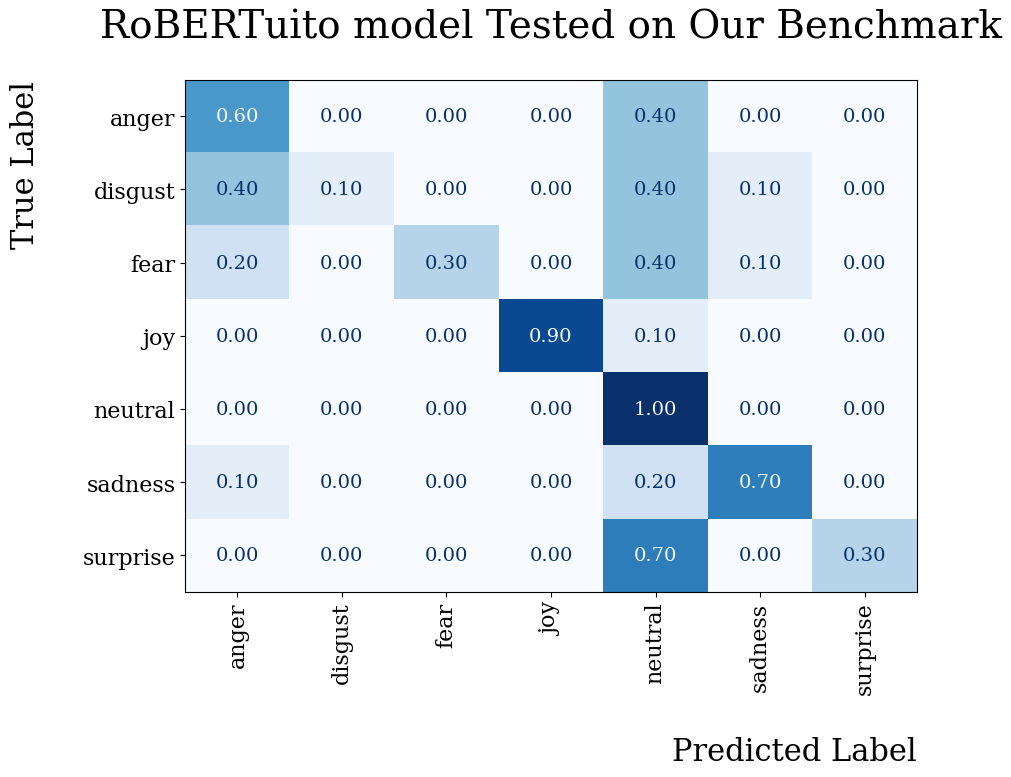

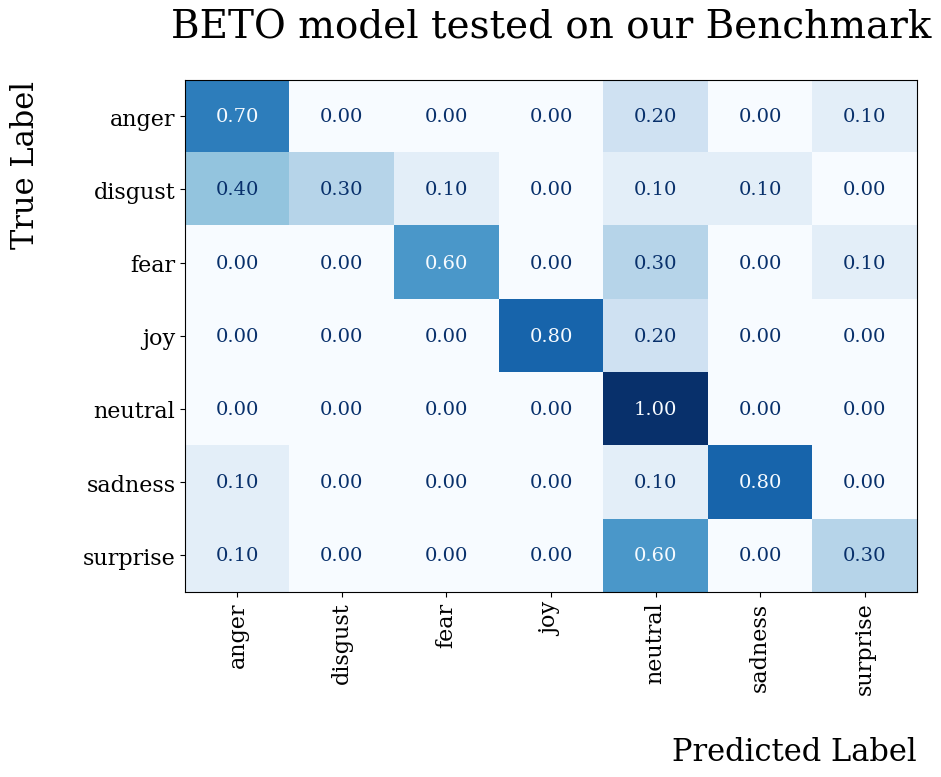

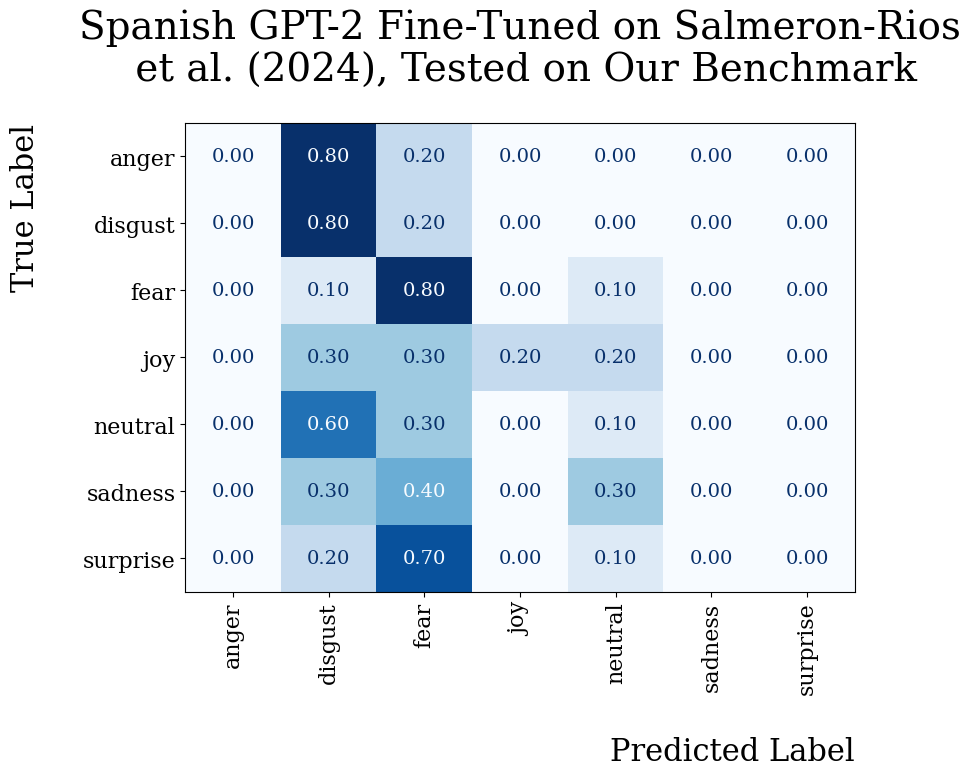

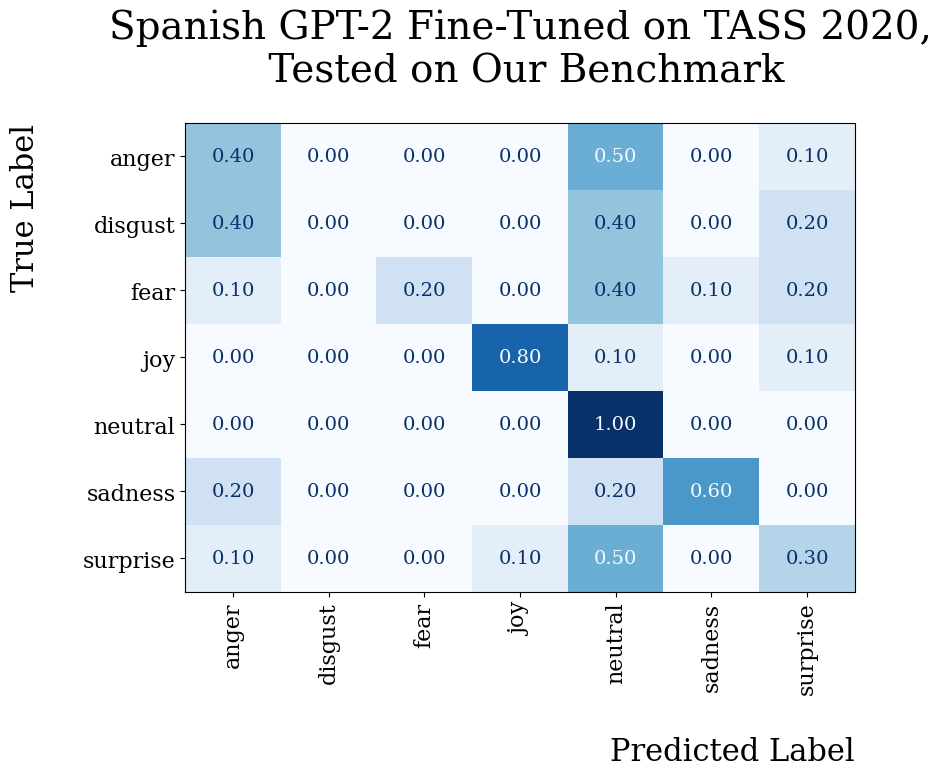

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams

def plot_confusion_matrix(benchmark, y_pred_column: str, title: str, save = 0):
    y_true = benchmark['clase']
    y_pred = benchmark[y_pred_column]

    sorted_labels = sorted(y_true.unique())

    rcParams.update({'font.size': 14})
    mpl.rcParams['font.family'] = 'serif'
    mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']

    cm = confusion_matrix(y_true, y_pred, labels=sorted_labels, normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted_labels)

    fig, ax = plt.subplots(figsize=(12, 8))
    disp.plot(cmap='Blues', ax=ax, colorbar=False, values_format=".2f")

    plt.xlabel("Predicted Label", loc='right', fontsize=22, labelpad=30)
    plt.ylabel("True Label", loc='top', fontsize=22, labelpad=30)
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.title(title, fontsize=28, pad=30)
    ax.set_aspect(0.7)

    plt.tight_layout()
    if save:
        plt.savefig(f'/content/drive/MyDrive/{y_pred_column}.png', dpi=600)
    plt.show()

cases = {'preds_robertuito': 'RoBERTuito model Tested on Our Benchmark',
         'preds_beto': 'BETO model tested on our Benchmark',
         'preds_gpt_peerj': 'Spanish GPT-2 Fine-Tuned on Salmeron-Rios\n et al. (2024), Tested on Our Benchmark',
         'preds_gpt_tass2020': 'Spanish GPT-2 Fine-Tuned on TASS 2020,\n Tested on Our Benchmark'}

for case, title in cases.items():
    plot_confusion_matrix(benchmark, case, title, save=0)

In [ ]:
from sklearn.metrics import classification_report
report_dicts = {}
models = ['preds_robertuito', 'preds_beto', 'preds_gpt_peerj', 'preds_gpt_tass2020']

for model in models:
    report = classification_report(benchmark['clase'], benchmark[model], output_dict=True, zero_division=0)
    # Convertimos a DataFrame
    df_report = pd.DataFrame(report).transpose()
    df_report['model'] = model
    report_dicts[model] = df_report
report_df = pd.concat(report_dicts.values())
report_df.reset_index(inplace=True)
report_df.rename(columns={'index': 'emotion'}, inplace=True)
df_results = report_df[report_df['emotion'].isin(['joy', 'anger', 'sadness', 'fear', 'neutral', 'surprise'])][['emotion', 'model', 'precision', 'recall']].copy()
model_dict = {'preds_robertuito': 'RoBERTuito', 'preds_beto': 'BETO', 'preds_gpt_peerj': 'GPT-2 (Salmeron)', 'preds_gpt_tass2020': 'GPT-2 (TASS)'}
df_results['model'] = df_results['model'].replace(model_dict)
df_results['emotion'] = df_results['emotion'].str.capitalize()
df_results.rename(columns={'precision': 'Precision', 'recall': 'Recall'}, inplace=True)
df_results

,emotion,model,Precision,Recall
0,Anger,RoBERTuito,0.461538,0.6
2,Fear,RoBERTuito,1.000000,0.3
3,Joy,RoBERTuito,1.000000,0.9
4,Neutral,RoBERTuito,0.312500,1.0
5,Sadness,RoBERTuito,0.777778,0.7
6,Surprise,RoBERTuito,1.000000,0.3
10,Anger,BETO,0.538462,0.7
12,Fear,BETO,0.857143,0.6
13,Joy,BETO,1.000000,0.8
14,Neutral,BETO,0.400000,1.0


In [5]:
df_pivot = df_results.set_index(['emotion', 'model']).stack().unstack([1, 2])
df_pivot

model   RoBERTuito             BETO        GPT-2 (Salmeron)         \
         Precision Recall Precision Recall        Precision Recall   
emotion                                                              
Anger     0.461538    0.6  0.538462    0.7              0.0    0.0   
Joy       1.000000    0.9  1.000000    0.8              1.0    0.2   
Sadness   0.777778    0.7  0.888889    0.8              0.0    0.0   

model   GPT-2 (TASS)         
           Precision Recall  
emotion                      
Anger       0.333333    0.4  
Joy         0.888889    0.8  
Sadness     0.857143    0.6

In [6]:
latex_code = df_pivot.to_latex(multicolumn=True, multicolumn_format='c', float_format="%.2f")
print(latex_code)

\begin{tabular}{lrrrrrrrr}
\toprule
model & \multicolumn{2}{c}{RoBERTuito} & \multicolumn{2}{c}{BETO} & \multicolumn{2}{c}{GPT-2 (Salmeron)} & \multicolumn{2}{c}{GPT-2 (TASS)} \\
 & Precision & Recall & Precision & Recall & Precision & Recall & Precision & Recall \\
emotion &  &  &  &  &  &  &  &  \\
\midrule
Anger & 0.46 & 0.60 & 0.54 & 0.70 & 0.00 & 0.00 & 0.33 & 0.40 \\
Joy & 1.00 & 0.90 & 1.00 & 0.80 & 1.00 & 0.20 & 0.89 & 0.80 \\
Sadness & 0.78 & 0.70 & 0.89 & 0.80 & 0.00 & 0.00 & 0.86 & 0.60 \\
\bottomrule
\end{tabular}

